### Importing libraries

In [1]:
import json
import requests
from skimage import io, transform

### make a request to the GitHub API using the username

In [2]:
username = input('enter a GitHub username')
url = 'https://api.github.com/users/{}'.format(username)
response = requests.get(url)

### If the request is successful, retrieve the user's profile information and display it

Username : RazaMasood
Name : BrainyByte
Bio : Hi there 👋
I'm Masood and I'm a student.
I'm passionate about data science and machine learning and have created some related projects.
Location: Bhopal, IN
Public Repositories : 5
Repositories Name :
	 cat_and_dog_classifier
	 Flipkart_Price_Scraper
	 GitHub-API-User-Info-Viewer
	 handwritten_digit_recognition
	 Ukraine_Russia_War-Twitter-Sentiment_Analysis
Followers : 0
Following : 0


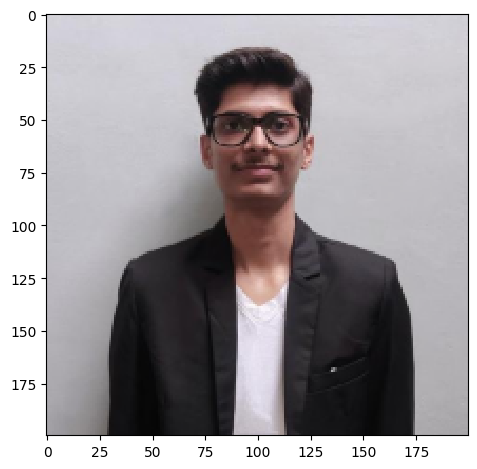

In [3]:
if response.status_code == 200:
    output = response.json()

    print('Username', ':',  output["login"])
    print('Name', ':', output["name"])
    print('Bio', ':', output["bio"])
    print('Location' ':', output["location"])
    print('Public Repositories', ':', output["public_repos"])

    repos_url = output['repos_url']
    repos_response = requests.get(repos_url)
    repos_information = repos_response.json()

    print('Repositories Name', ':')
    for repo in repos_information:
        print('\t', repo['name'])

    print('Followers', ':', output["followers"])
    print('Following', ':', output["following"])

    img_url = output['avatar_url']
    image = io.imread(img_url)
    image = transform.resize(image, (200, 200))

    io.imshow(image)
    io.show()
else:
    print('User not found.')